<a href="https://www.kaggle.com/code/bhavinmoriya/stat-500-penn-state-university-2?scriptVersionId=122811844" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

We shall continue the course. In this course, a z-distribution and a standard normal distribution are the same thing.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
import statistics as st
sns.set()
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Binomial Distribution

The binomial distribution is a special discrete distribution where there are two distinct complementary outcomes, a “success” and a “failure”.

We have a binomial experiment if ALL of the following four conditions are satisfied:

- The experiment consists of n identical trials.
- Each trial results in one of the two outcomes, called success and failure.
- The probability of success, denoted p, remains the same from trial to trial.
- The n trials are independent. That is, the outcome of any trial does not affect the outcome of the others.



Text(0.5, 0.98, '10 trial Histogram for Binomial distribution')

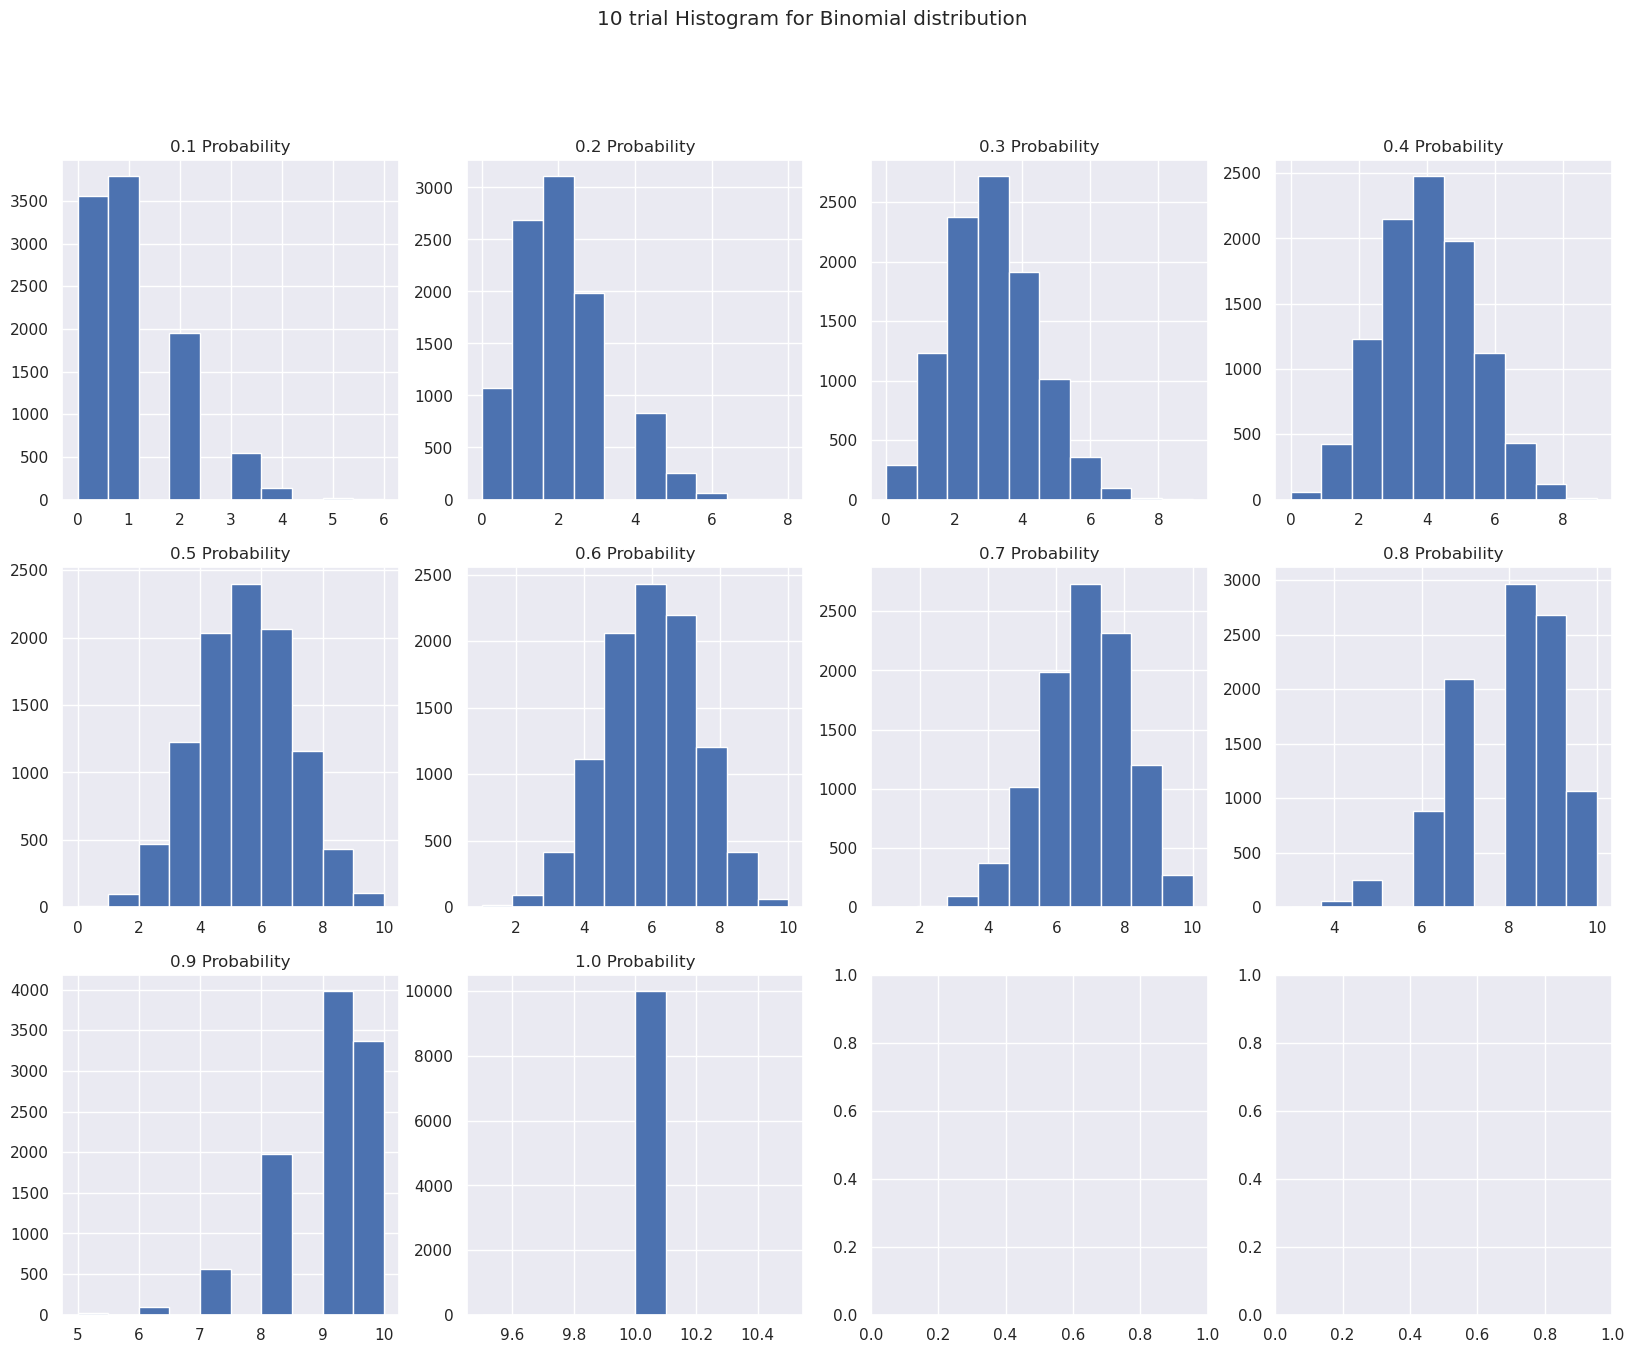

In [2]:
fig, ax = plt.subplots(3,4, figsize=(20,15))
ax = ax.flatten()
for i in range(1,11):
    ax[i-1].hist(binom.rvs(n=10, p=.1*i, size=10000))
    ax[i-1].set_title(f'{np.round(.1*i,2)} Probability')
plt.suptitle('10 trial Histogram for Binomial distribution')

An FBI survey shows that about 80% of all property crimes go unsolved. Suppose that in your town 3 such crimes are committed and they are each deemed independent of each other. What is the probability that 1 of 3 of these crimes will be solved?

In [3]:
print(f'The probability that 1 of 3 of these crimes will be solved is : {binom.pmf(n=3, p=.2, k=1)}')

The probability that 1 of 3 of these crimes will be solved is : 0.38400000000000006


For the FBI Crime Survey example, what is the probability that at least one of the crimes will be solved?

In [4]:
print(f'the probability that at least one of the crimes will be solved is : {1 - binom.pmf(n=3, p=.2, k=0)}')

the probability that at least one of the crimes will be solved is : 0.4879999999999999


In such a situation where three crimes happen, what is the expected value and standard deviation of crimes that remain unsolved? Here we apply the formulas for expected value and standard deviation of a binomial.

In [5]:
print(f'The expected value, Variance and standard deviation of crimes that remain unsolved are:\n\
{binom.mean(n=3, p=.8),binom.var(n=3, p=.8),binom.std(n=3, p=.8)}')

The expected value, Variance and standard deviation of crimes that remain unsolved are:
(2.4000000000000004, 0.48, 0.6928203230275509)


Cross-fertilizing a red and a white flower produces red flowers 25% of the time. Now we cross-fertilize five pairs of red and white flowers and produce five offspring. Find the probability that there will be no red-flowered plants in the five offspring.

$$Y= \text{No. of red flowered plants in the five offspring. Here, the number of red-flowered plants has a binomial distribution with } n = 5, p= .25$$ 


In [6]:
print(f'the probability that there will be no red-flowered plants in the five offspring is : \
{binom.pmf(n=5, p=.25, k=0)}')

the probability that there will be no red-flowered plants in the five offspring is : 0.2373046875


Find the probability that there will be four or more red-flowered plants.

In [7]:
binom.pmf(n=5, p=.25, k=4) + binom.pmf(n=5, p=.25, k=5)

0.015624999999999998

Of the five cross-fertilized offspring, how many red-flowered plants do you expect?


In [8]:
binom.mean(n=5, p=.25)

1.25

What is the standard deviation of Y, the number of red-flowered plants in the five cross-fertilized offspring?

In [9]:
binom.std(n=5, p=.25)

0.9682458365518543

# Continuous Probability Distributions
In the beginning of the course we looked at the difference between discrete and continuous data. The last section explored working with discrete data, specifically, the distributions of discrete data. In this lesson we're again looking at the distributions but now in terms of continuous data. Examples of continuous data include...

- the amount of rainfall in inches in a year for a city.
- the weight of a newborn baby.
- the height of a randomly selected student.

##  The Normal Distribution


In [10]:
from scipy.stats import norm

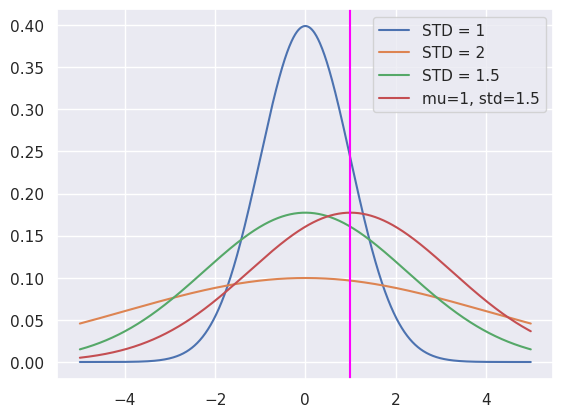

In [11]:
x = np.linspace(-5,5,1000)
for i in [1,2,1.5]:
    plt.plot(x, norm.pdf(x, loc=0, scale=i**2), label=f'STD = {i}')
plt.plot(x, norm.pdf(x,loc=1, scale=1.5**2), label='mu=1, std=1.5')
plt.axvline(1, c='magenta')
plt.legend();

Find the area under the standard normal curve to the left of 0.87.

In [12]:
norm.cdf(.87)

0.8078497978963038

Find the area under the standard normal curve to the right of 0.87.

In [13]:
1 - norm.cdf(.87)

0.19215020210369615

Find the area under the standard normal curve between 2 and 3.

In [14]:
norm.cdf(3) - norm.cdf(2)

0.021400233916549105

Find the 10th percentile of the standard normal curve. PPF -- Point percentile function -- is an inverse function of CDF. ppf(a) = x means P(X \le x) = a.

In [15]:
norm.ppf(.1)

-1.2815515655446004

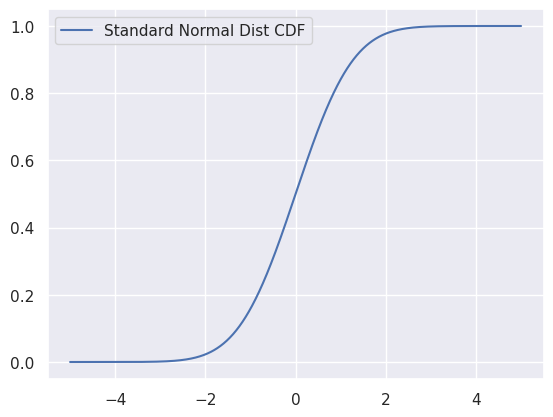

In [16]:
plt.plot(x, norm.cdf(x), label='Standard Normal Dist CDF')
plt.legend()

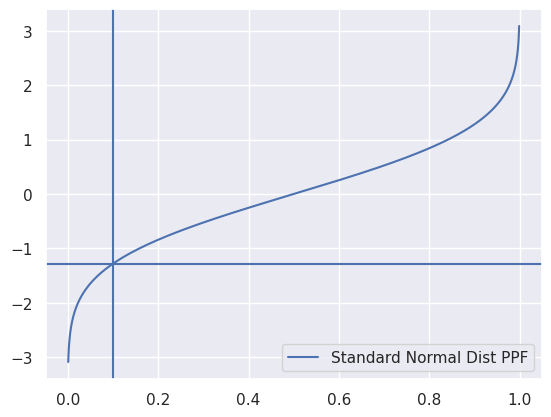

In [17]:
a = np.linspace(0,1,1000)
plt.plot(a, norm.ppf(a), label='Standard Normal Dist PPF')
plt.axvline(.10)
plt.axhline(norm.ppf(.1))
plt.legend()

# Z-value, Z-score, or Z
The Z-value (or sometimes referred to as Z-score or simply Z) represents the number of standard deviations an observation is from the mean for a set of data. To find the z-score for a particular observation we apply the following formula:

$$ Z = \frac{\text{Observed value - Mean}}{\text{SD}}$$

Let's take a look at the idea of a z-score within context.

For a recent final exam in STAT 500, the mean was 68.55 with a standard deviation of 15.45.

- If you scored an 80%: .74, which means your score of 80 was 0.74 SD above the mean.
- If you scored a 60%: -.55, which means your score of 60 was 0.55 SD below the mean.

## Characteristics of Z-scores
The scores can be positive or negative.
For data that is symmetric (i.e. bell-shaped) or nearly symmetric, a common application of Z-scores for identifying potential outliers is for any Z-scores that are beyond ± 3.
Maximum possible Z-score for a set of data is $$\frac{n - 1}{\sqrt{n}}$$



Example 3-13: Heights
According to the Center for Disease Control, heights for U.S. adult females and males are approximately normal.

Females: mean of 64 inches and SD of 2 inches

Males: mean of 69 inches and SD of 3 inches

Find the probability of a randomly selected U.S. adult female being shorter than 65 inches.

In [18]:
# the probability of a randomly selected U.S. adult female being shorter than 65 inches.
# loc=64=mean, scale=2=sd
norm.cdf(65, loc=64, scale=2)

0.6914624612740131

In [19]:
# the probability of a randomly selected U.S. adult female being shorter than 65 inches. This could be calculated
# using z-score in a following mannner
def zscore(observed, mean, sd):
    return (observed - mean) / sd

z = zscore(65, 64, 2)
print(f'the probability of a randomly selected U.S. adult female being shorter than 65 inches \
is : {norm.cdf(z)}')

the probability of a randomly selected U.S. adult female being shorter than 65 inches is : 0.6914624612740131


So, roughly there this a 69% chance that a randomly selected U.S. adult female would be shorter than 65 inches.

As you could see both value matches. Below we could run some for loop if this is the case often.

In [20]:
j = 1
for i in [.5*i for i in range(10)]:
    
    z = zscore(65 + j*i, 64, 2)
    print(f'Prob using z score : \t\t{norm.cdf(z)}')
    print(f'Prob without doing z score :    {norm.cdf(65 + j*i, loc=64, scale=2)}\n\n')
    j *= -1

Prob using z score : 		0.6914624612740131
Prob without doing z score :    0.6914624612740131


Prob using z score : 		0.5987063256829237
Prob without doing z score :    0.5987063256829237


Prob using z score : 		0.8413447460685429
Prob without doing z score :    0.8413447460685429


Prob using z score : 		0.4012936743170763
Prob without doing z score :    0.4012936743170763


Prob using z score : 		0.9331927987311419
Prob without doing z score :    0.9331927987311419


Prob using z score : 		0.2266273523768682
Prob without doing z score :    0.2266273523768682


Prob using z score : 		0.9772498680518208
Prob without doing z score :    0.9772498680518208


Prob using z score : 		0.10564977366685535
Prob without doing z score :    0.10564977366685535


Prob using z score : 		0.9937903346742238
Prob without doing z score :    0.9937903346742238


Prob using z score : 		0.040059156863817086
Prob without doing z score :    0.040059156863817086




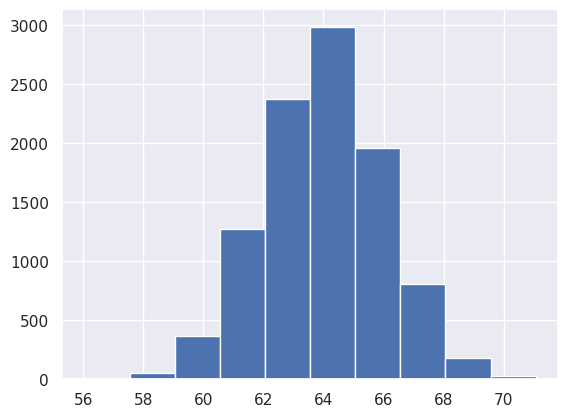

In [21]:
# we could create the fake data of female heights 
female_height = norm.rvs(size=10000, loc=64, scale=2)
plt.hist(female_height);

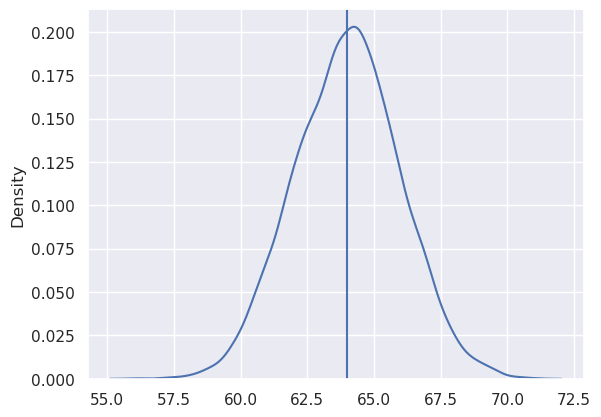

In [22]:
sns.kdeplot(female_height)
plt.axvline(64)

# Example 3-14: Weights

The weights of 10-year-old girls are known to be normally distributed with a mean of 70 pounds and a standard deviation of 13 pounds. Find the percentage of 10-year-old girls with weights between 60 and 90 pounds.

In other words, we want to find $P(60< X<90)$
, where $X$ has a normal distribution with mean 70 and standard deviation 13.

In [23]:
print(f'The prob is : {norm.cdf(90, loc=70, scale=13) - norm.cdf(60, loc=70, scale=13)}')

The prob is : 0.717153933451169


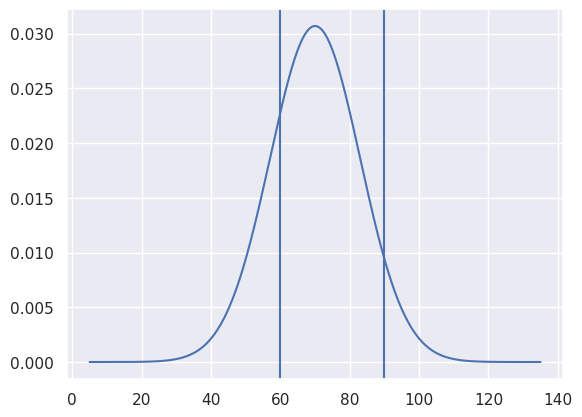

In [24]:
x = np.linspace(70-5*13,70+5*13,1000)
y = norm.pdf(x, loc=70, scale=13)
plt.plot(x, y)

plt.axvline(90)
plt.axvline(60)


We obtain that 71.76% of 10-year-old girls have weight between 60 pounds and 90 pounds.



In [25]:
# Find the 60th percentile for the weight of 10-year-old girls given that the weight is normally distributed 
# with a mean 70 pounds and a standard deviation of 13 pounds.
norm.ppf(.6, loc=70, scale=13)

73.2935123407654

Therefore, the 60th percentile of 10-year-old girls' weight is 73.29 pounds.

#  The Empirical Rule
The Empirical Rule is sometimes referred to as the 68-95-99.7% Rule. The rule is a statement about normal or bell-shaped distributions. Observe as follows,



In [26]:
for i in range(1,8):
    print(f'{i}-SD from mean has the probability : \
    {norm.cdf(70+i*13, loc=70, scale=13) - norm.cdf(70-i*13, loc=70, scale=13)}')

1-SD from mean has the probability :     0.6826894921370859
2-SD from mean has the probability :     0.9544997361036416
3-SD from mean has the probability :     0.9973002039367398
4-SD from mean has the probability :     0.9999366575163338
5-SD from mean has the probability :     0.9999994266968562
6-SD from mean has the probability :     0.9999999980268246
7-SD from mean has the probability :     0.9999999999974403


In [27]:
for i in range(1,8):
    print(f'{i}-SD from mean has the probability : \
    {norm.cdf(i) - norm.cdf(-i)}')# Standard Normal Dist

1-SD from mean has the probability :     0.6826894921370859
2-SD from mean has the probability :     0.9544997361036416
3-SD from mean has the probability :     0.9973002039367398
4-SD from mean has the probability :     0.9999366575163338
5-SD from mean has the probability :     0.9999994266968562
6-SD from mean has the probability :     0.9999999980268246
7-SD from mean has the probability :     0.9999999999974403


# Sampling Error
The error resulting from using a sample characteristic to estimate a population characteristic.
Sample size and sampling error: As the dotplots above show, the possible sample means cluster more closely around the population mean as the sample size increases. Thus, the possible sampling error decreases as sample size increases.

What happens when the population is not small, as in the pumpkin example?

## Sample Means with Large Samples: Exam Example
An instructor of an introduction to statistics course has 200 students. The scores out of 100 points are shown in the histogram.

The population mean is 71.18 and the population standard deviation is 10.73

Let's demonstrate the sampling distribution of the sample means using the StatKey website. The first video will demonstrate the sampling distribution of the sample mean when n = 10 for the exam scores data. The second video will show the same data but with samples of n = 30.

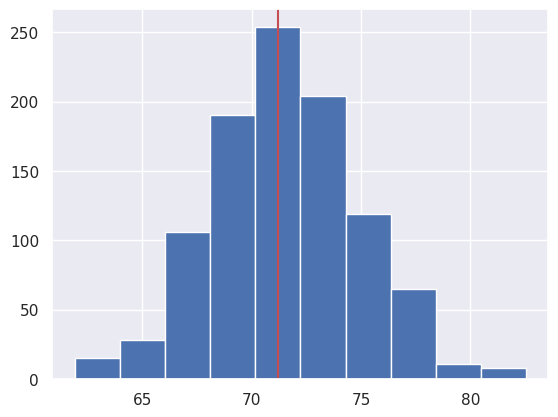

In [28]:
students = norm.rvs(size=200, loc=71.18, scale=10.73)

sample_dist = [np.random.choice(students, 10).mean() for _ in range(1000)]
plt.hist(sample_dist)
plt.axvline(71.18, color='r')
# sns.kdeplot(sample_dist)

<AxesSubplot:ylabel='Density'>

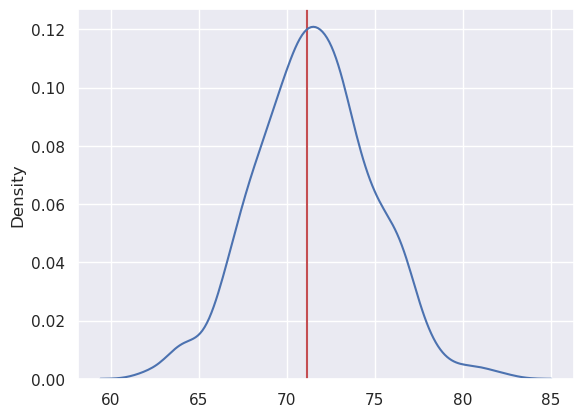

In [29]:
plt.axvline(71.18, color='r')
sns.kdeplot(sample_dist)

In [30]:
# diffrence between mean of sample statistics is not far from population statistic(mean in this case)

students.mean() - np.mean(sample_dist)

0.022707204473235265

# Speedboat Engines
The engines made by Ford for speedboats have an average power of 220 horsepower (HP) and standard deviation of 15 HP. You can assume the distribution of power follows a normal distribution.

Consumer Reports® is testing the engines and will dispute the company's claim if the sample mean is less than 215 HP. If they take a sample of 4 engines, what is the probability the mean is less than 215?

**PS. While we do sample statistics, we take sample mean = populationn mean and sample_mean std (that is, std of means of sampling distribution) = population std / $\sqrt(n)$, where n is size of sample.**

In [31]:
norm.cdf(215, loc=220, scale=15/np.sqrt(4))

0.2524925375469229

Using the speedboat engines example above, answer the following question.

If Consumer Reports® samples 100 engines, what is the probability that the sample mean will be less than 215?

In [32]:
norm.cdf(215, loc=220, scale=15/np.sqrt(100))

0.0004290603331968372

# Weights of Baby Giraffes
The weights of baby giraffes are known to have a mean of 125 pounds and a standard deviation of 15 pounds.

If we obtained a random sample of 40 baby giraffes,

- what is the probability that the sample mean will be between 120 and 130 pounds?
- what is the 75th percentile of the sample means of size n=40?


In [33]:
print(f'The probability that the sample mean will be between 120 and 130 pounds : \
{norm.cdf(130,loc=125, scale=15/np.sqrt(40)) - norm.cdf(120,loc=125, scale=15/np.sqrt(40))}')

The probability that the sample mean will be between 120 and 130 pounds : 0.9649850189803375


In [34]:
print(f'the 75th percentile of the sample means of size n=40 : {norm.ppf(.75, loc=125, scale=15/np.sqrt(40))}')

the 75th percentile of the sample means of size n=40 : 126.59969290179322


# iPhone Users
Suppose it is known that 43% of Americans own an iPhone. If a random sample of 50 Americans were surveyed, what is the probability that the proportion of the sample who owned an iPhone is between 45% and 50%?

In [35]:
n = 50
p = .43
scale = np.sqrt(p*(1-p)/n)
norm.cdf(.5, loc=.43, scale=scale) - norm.cdf(.45, loc=.43, scale=scale)

0.22886618040339746

As we might feel, that raising the sample size would reduce the prob of sample proportion in 45 to 50 percent.

In [36]:
for i in range(10,50000, 5000):
    scale = np.sqrt(p*(1-p)/i)
    print(f'For sample size = {i}, the prob is :\
    {norm.cdf(.5, loc=.43, scale=scale) - norm.cdf(.45, loc=.43, scale=scale)}')

For sample size = 10, the prob is :    0.12178034961342343
For sample size = 5010, the prob is :    0.002122115191319107
For sample size = 10010, the prob is :    2.6520643550798084e-05
For sample size = 15010, the prob is :    3.722973694886278e-07
For sample size = 20010, the prob is :    5.499800170838398e-09
For sample size = 25010, the prob is :    8.362932568672932e-11
For sample size = 30010, the prob is :    1.2956302697375577e-12
For sample size = 35010, the prob is :    2.0317081350640365e-14
For sample size = 40010, the prob is :    3.3306690738754696e-16
For sample size = 45010, the prob is :    0.0


If a random sample of size of seventy five was surveyed, what is the probability we would find more than 50% of Americans with an iPhone?



In [37]:
n = 75
p = .43
scale = np.sqrt(p*(1-p)/n)
1 - norm.cdf(.5, loc=.43, scale=scale)

0.11038277568673194

Therefore, there is a 11.03% chance to get a sample proportion of 50% or higher in a sample size of 75.

# Introduction to Inferences

The real power of statistics comes from applying the concepts of probability to situations where you have data but not necessarily the whole population. The results, called statistical inference, give you probability statements about the population of interest based on that set of data.

Types of Statistical Inference
There are two types of statistical inferences: Estimation and Statistical Tests.

- Estimation

Use information from the sample to estimate (or predict) the parameter of interest.

For instance, using the result of a poll about the president's current approval rating to estimate (or predict) his or her true current approval rating nationwide.

- Statistical Tests

Use information from the sample to determine whether a certain statement about the parameter of interest is true. Statistical tests are also referred to as hypothesis tests.

For instance, suppose a news station claims that the President’s current approval rating is more than 75%. We want to determine whether that statement is supported by the poll data.

## Example :
A random sample of 1500 U.S. adults is taken. They are asked whether they approve or disapprove of the current president's performance so far (i.e. an approval rating). Of the 1500 surveyed, 660 respond with "approve". Calculate a 95% confidence interval (CI) for the overall approval rating of the the president.

We shall use Z-method to calculation (CI) - could be used when the following holds true :
- np > 5
- n(1-p) > 5

In [38]:
n = 1500
success = 660
# phat = success/n
alpha = .95

def confi_interval(n, success, alpha):
    phat = success/n
    sd = np.sqrt(phat * (1 - phat) / n)
    z_alphaby2 = -norm.ppf((1 - alpha)/2)
    margin_error = z_alphaby2 * sd
    print(f'Confidence interval with confidence = {alpha} is : {phat - margin_error, phat + margin_error}')
    
confi_interval(n, success, alpha)

Confidence interval with confidence = 0.95 is : (0.4148798161708023, 0.46512018382919773)


"We are 95% confident that the overall U.S. adult approval rating for the current president is from 41.5% to 46.5%." You could also see this written as, "The current U.S. approval rating for the president is 44% with a 95% margin of error of 2.5%." Commonly, the standard level of confidence is 95% so that reference is often left out as that is the assumed level of confidence unless otherwise stated. Also, the method calculates a proportion but often the reported values are converted to percentages. If you use the decimal formal (e.g. 0.415 and 0.465) then reference these as proportion and not percentage.

In [39]:
for i in range(80,100):
    confi_interval(n, success, i/100)

Confidence interval with confidence = 0.8 is : (0.4235747946559175, 0.4564252053440825)
Confidence interval with confidence = 0.81 is : (0.4232027585812522, 0.4567972414187478)
Confidence interval with confidence = 0.82 is : (0.42281600418074816, 0.45718399581925184)
Confidence interval with confidence = 0.83 is : (0.42241293605134156, 0.45758706394865845)
Confidence interval with confidence = 0.84 is : (0.4219916813948811, 0.4580083186051189)
Confidence interval with confidence = 0.85 is : (0.4215500205804162, 0.4584499794195838)
Confidence interval with confidence = 0.86 is : (0.421085294314711, 0.458914705685289)
Confidence interval with confidence = 0.87 is : (0.42059427721471254, 0.45940572278528746)
Confidence interval with confidence = 0.88 is : (0.42007300194435926, 0.45992699805564075)
Confidence interval with confidence = 0.89 is : (0.4195165085756179, 0.4604834914243821)
Confidence interval with confidence = 0.9 is : (0.41891847717250785, 0.46108152282749215)
Confidence inte

We want to know the proportion of graduate students at Penn State who are Democrats. To answer the question, we give out the following survey:

Are you a Democrat? Please circle one answer.

- Yes
- No

Suppose that we get 10 people that circled Yes and 20 people that circled No (that includes the case when people don't know whether they are Democrats!!)

- Let X = the number of successes (number of students who chose Yes) = 10
- n = number of trials = 30
Find a 90% confidence interval for the proportion of graduate students who are democrats.



In [40]:
yes, no = 10, 20
n = yes + no
alpha = .9
phat = yes/n

confi_interval(n, yes, alpha)

Confidence interval with confidence = 0.9 is : (0.19176687324151284, 0.47489979342515376)


We are 90% confident that the population proportion of graduate students at Penn State who are democrats is between 19.15% and 47.45%.

**PS. Interpreting x% CI as the probability of the population parameter has x% prob of being in CI is a wrong interpretation. Correct meaning is, if we were to sample 100 times and for each sample we were to calculate the confidence interval then x of those intervals would have the correct population parameter. The larger the number of samples (don't confuse with sample size.) better would it reflect x% confidence.**

# Sample Size Computation
Sample Size Computation for the Population Proportion Confidence Interval
An important part of obtaining desired results is to get a large enough sample size. We can use what we know about the margin of error and the desired level of confidence to determine an appropriate sample size.

Recall that the margin of error, E, is half of the width of the confidence interval. Therefore for a one sample proportion,
$$\text{margin of error} = E = z_{\alpha/2} * \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$
Precision
The wider the interval, the poorer the precision. Note that the higher the confidence level, the wider the width (or equivalently, half width) of the interval and thus the poorer the precision.
Since the confidence level reflects the success rate of the method we use to get the confidence interval, we like to have a narrower interval while keeping the confidence level at a reasonably higher level.

For most newspapers and magazine polls, it is understood that the margin of error is calculated for a 95% confidence interval (if not stated otherwise). A 3% margin of error is a popular choice also. For instance, you might see a television poll state that the "approval rating of the president is 72%; the margin of error of the poll is plus or minus 3%."

If we want the margin of error smaller (i.e., narrower intervals), we can increase the sample size. Or, if you calculate a 90% confidence interval instead of a 95% confidence interval, the margin of error will also be smaller. However, when one reports it, remember to state that the confidence interval is only 90% because otherwise, people will assume 95% confidence.

## Determining the Required Sample Size
If the desired margin of error E is specified and the desired confidence level is specified, the required sample size to meet the requirements can be calculated by two methods:
1. Educated guess

$$n = z_{\alpha/2}^2 * \sqrt{\frac{\hat{p_g}(1-\hat{p_g})}{E^2}}$$
Where $\hat{p_g}$ is an educated guess for the parameter.

*The educated guess method is used if it is relatively inexpensive to sample more elements when needed.

2. Conservative Method
$$n = z_{\alpha/2}^2 * \sqrt{\frac{1/4}{E^2}}$$

For $0\le \hat{p_g}\le 1, \hat{p_g}(1-\hat{p_g})$ assumes max at $p_g = 1/2$.

*The conservative method is used if the start-up cost of sampling is expensive and thus it is not economical to sample more elements later.

The sample size obtained from using the educated guess is usually smaller than the one obtained using the conservative method. This smaller sample size means there is some risk that the resulting confidence interval may be wider than desired. Using the sample size by the conservative method has no such risk.

In [41]:
'''Example 5-4
Suppose a television poll states that the "approval rating of the president is 72%." 
For the next poll of the president's approval rating, we want to get a margin of error of 1% 
with 95% confidence. How many individuals should we sample?

'''

z_alphaby2 = -norm.ppf(.05/2)
E = .01
pg = .72

n = (z_alphaby2 ** 2)*(pg*(1-pg))/(E**2)
pg=1/2
m = (z_alphaby2 ** 2)*(pg*(1-pg))/(E**2)
print(f'Fore given approval rating the sample size is : {np.ceil(n)}')
print(f'Conservative size is : {np.ceil(m)}')

Fore given approval rating the sample size is : 7745.0
Conservative size is : 9604.0


# Constructing a Confidence Interval for the Population Mean
To construct a confidence interval for a population mean, we're going to apply the same three steps as with the population proportion, but first, let's look at the two possible cases.

## Case 1: $\sigma$ is known
In the previous lesson, we learned that if the population is normal with mean $\mu$
and standard deviation, $\sigma$, then the distribution of the sample mean will be Normal with mean $\mu$ and standard error $\sigma/\sqrt{n}$.
 
Following the similar idea to developing the confidence interval for 
$p$, the $(1-\alpha)100\%$ confidence interval for the population mean is...

$$P(\left|\frac{\bar{x} - \mu}{\sigma/\sqrt{n}}\right|\le z_{\alpha/2}) = 1 - \alpha$$

## Case 2: $\sigma$ is unknown
When the population is normal or when the sample size is large then,
$$Z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}$$

where Z has a standard Normal distribution.

Usually, we don't know $\sigma$, so what can we do?

Recall that if X comes from a normal distribution with mean, $\mu$
and variance, $\sigma^2$, or if $n\ge 30$, , then the sampling distribution will be approximately normal with mean $\mu$ 
and standard error, $\sigma/\sqrt{n}$.

One way to estimate $\sigma$
 is by $s$
, the standard deviation of the sample, and replace $\sigma$
 by $s$
 in the above Z-equation. However, this new quotient no longer has a Z-distribution. Instead it has a t-distribution. We call the following a 'studentized' version of $\bar{X}$
 
$$t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$$

## Constructing the Confidence Interval
CHECK THE CONDITIONS

One of the following conditions need to be satisfied:

1. If the sample comes from a Normal distribution, then the sample mean will also be normal. In this case, 
$\frac{\bar{x} - \mu}{s/\sqrt{n}}$ will follow a 
t-distribution with $(n-1)$ degrees of freedom.
2. If the sample does not come from a normal distribution but the sample size is large $(n\ge 30)$, we can apply the Central Limit Theorem and state that $\bar{X}$ is approximately normal. Therefore, 
$\frac{\bar{x} - \mu}{s/\sqrt{n}}$ will follow a 
t-distribution with $(n-1)$ degrees of freedom.

## What if the conditions are not met?
What will you do if you cannot use the t-interval? What do we do when the above conditions are not satisfied?

1. If you do not know if the distribution comes from a normally distributed population and the sample size is small (i.e $n\ge 30$), you can use the Normal Probability Plot to check if the data come from a normal distribution.
2. You may want to consider what is known as nonparametric statistical methods. A procedure such as the one-sample Wilcoxon procedure.

In [42]:
from scipy.stats import t

In [43]:
# Find  where the degree of freedom is 30. When n \ge 35 then t and z distribution are almost same. So in various books 
# we do not see t-tables beyond 35. However, if we are using software, it is best practice to use t-dist.
t.ppf(.05, df=35), norm.ppf(.05)

(-1.6895724539637715, -1.6448536269514729)

# Emergency Room Wait Time
You are interested in the average emergency room (ER) wait time at your local hospital. You take a random sample of 50 patients who visit the ER over the past week. From this sample, the mean wait time was 30 minutes and the standard deviation was 20 minutes. Find a 95% confidence interval for the average ER wait time for the hospital.

In [44]:
mu = 30
sd = 20
n = 50
alpha = .95

'''Is the population data normal? We don't know. 
However, the sample size is 50 which exceeds our minimum requirement of 30 in order to use the t-interval.'''

def confi_int(mu, sd, n, alpha):
    t_alphaby2 = -t.ppf((1-alpha)/2, df=n-1)
#     t_alphaby2 = -norm.ppf((1-alpha)/2)
    margin_error = t_alphaby2 * sd / np.sqrt(n)
    lower, upper = mu - margin_error, mu + margin_error
#     print(t_alphaby2)
    print(f'Confidence interval for {alpha} confidence level is : {lower, upper}')
    return lower, upper
    

In [45]:
confi_int(mu, sd, n, alpha)

Confidence interval for 0.95 confidence level is : (24.316062897552538, 35.683937102447466)


(24.316062897552538, 35.683937102447466)

In [46]:
'''The mean length of certain construction lumber is supposed to be 8.5 feet. 
A random sample of 81 pieces of such lumber gives a sample mean of 8.3 feet and a sample standard 
deviation of 1.2 feet.

What is the 95% CI for "mean length of such lumber?"'''

mu = 8.3
sd = 1.2
n = 81
alpha = .95

confi_int(mu, sd, n, alpha)

Confidence interval for 0.95 confidence level is : (8.03465821052955, 8.565341789470452)


(8.03465821052955, 8.565341789470452)

In [47]:
# What is the 99% CI for "mean length of such lumber?"
alpha = .99
confi_int(mu, sd, n, alpha)

Confidence interval for 0.99 confidence level is : (7.9481745875012875, 8.651825412498715)


(7.9481745875012875, 8.651825412498715)

In [48]:
from scipy.stats import probplot, normaltest

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([38.5, 39.5, 40.2, 40.2, 41. , 41.6, 42.8, 43.1, 43.1, 44.5, 44.9,
         45.5])),
 (2.4029139464007883, 42.074999999999996, 0.9870305234421337))

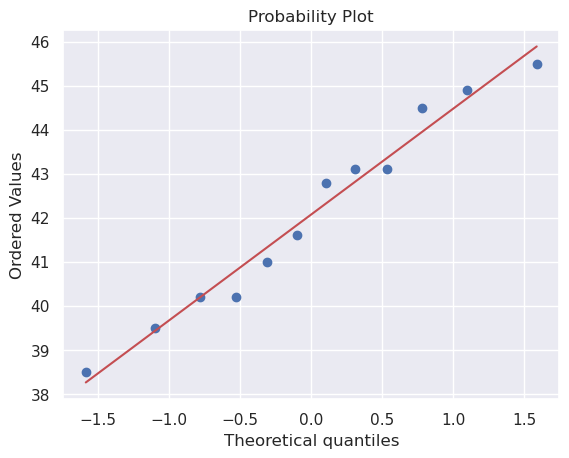

In [49]:
'''Rattlesnake Lengths
It is very time consuming to find rattlesnakes and nerve racking to measure them (for obvious reasons). 
A scientist randomly finds 12 snakes from the central Pennsylvania area and measures their length. 
The following twelve measurements in inches are obtained:

40.2, 43.1, 45.5, 44.5, 39.5, 38.5, 40.2, 41.0, 41.6, 43.1, 44.9, 42.8

Using the above data, find a 90% confidence interval for the mean length of rattlesnakes in the central 
Pennsylvania area.

'''

rattle = [40.2, 43.1, 45.5, 44.5, 39.5, 38.5, 40.2, 41.0, 41.6, 43.1, 44.9, 42.8]

probplot(x=rattle, plot=plt)

In [50]:
normaltest(rattle)

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=1.2100916687038634, pvalue=0.5460493982458425)

<AxesSubplot:ylabel='Density'>

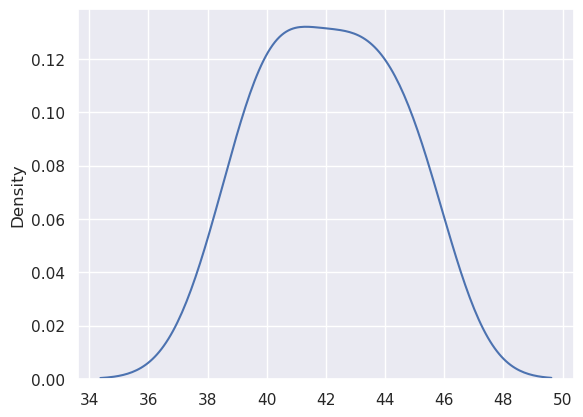

In [51]:
sns.kdeplot(rattle)

All three checks roughly says that sample is from normal dist.

In [52]:
mu = np.mean(rattle)
sd = np.std(rattle, ddof=1)
n = len(rattle)
alpha = .90

confi_int(mu, sd, n, alpha)

Confidence interval for 0.9 confidence level is : (40.904826486280506, 43.2451735137195)


(40.904826486280506, 43.2451735137195)

We are 90% confident that the population mean lengths of rattlesnakes is between 40.905 and 43.245 inches.

# Sample Size Computation for the Population Mean Confidence Interval Section
The margin of error, E, is equal to:
$$\displaystyle{E = t_{\alpha/2}\frac{ s }{ \sqrt{n}}}$$

To determine the sample size, one first decides the confidence level and the half width of the interval one wants. Then we can find the sample size to yield an interval with that confidence level and with a half width not more than the specified one. The crude method to find the sample size: 

$$n = \frac{z_{\alpha/2}^2 \sigma^2}{E^2}$$
Then round up to the next whole integer.

In [53]:
'''Spring Break
A marketing research firm wants to estimate the average amount a student spends during the Spring break. 
They want to determine it to within $120 with 90% confidence. One can roughly say that it ranges from $100 to $1700. 
How many students should they sample?
'''
alpha = .9
z_alphaby2 = -norm.ppf((1-alpha)/2) #t_alpha is not possible as we do not know df
'''Since the standard deviation is not given in the problem, we can estimate it using range/4,
 from Lesson 1.'''
sigma = (1700 - 100)/4
E = 120
n = np.ceil((z_alphaby2 * sigma/E)**2)
print(f'The size for given error margin {E} and for confidence level {alpha} is : {n}')

The size for given error margin 120 and for confidence level 0.9 is : 31.0


In [54]:
n = 20
def iter_met_for_n(intial_guess, alpha, sigma, E):
    n = intial_guess
    alpha = .9
    for _ in range(100):
        t_alphaby2 = -t.ppf((1-alpha)/2, df=n-1)
        n = np.ceil((t_alphaby2 * sigma/E)**2)
    return n
    

Just to check if we end up with the same answer.

In [55]:
for _ in range(10):
    n = np.random.randint(1,100)
    k = iter_met_for_n(n,alpha, sigma, E)
    print(f'For initial guess {n} we get the sample size = {k}')

For initial guess 84 we get the sample size = 32.0
For initial guess 38 we get the sample size = 32.0
For initial guess 53 we get the sample size = 32.0
For initial guess 60 we get the sample size = 32.0
For initial guess 87 we get the sample size = 32.0
For initial guess 65 we get the sample size = 32.0
For initial guess 40 we get the sample size = 32.0
For initial guess 23 we get the sample size = 32.0
For initial guess 83 we get the sample size = 32.0
For initial guess 61 we get the sample size = 32.0


Looks like method reaches the same point, irrespective of initial guess :)

To be continued : https://www.kaggle.com/bhavinmoriya/stat-500-penn-state-university-3/